In [2]:
# we use Pandas to work with the data as it makes working with categorical data very easy
import pandas as pd

In [3]:
# this is a list of the column names in our dataset (as the file doesn't contain any headers)

# some fields are categorical and will require special treatment
categorical = set((
    # 'USIA',
    'JURUSAN',
    'PROGRAM STUDI',
    'MASA STUDI (THN)',
    'EMAIL',
    'PROPINSI SEKOLAH',
    'IPK LULUS'
))

df = pd.read_csv("data.csv");# We load the data using Pandas

In [4]:
df.head()

,NOMOR IJASAH,NPM,NAMA UNTUK IJASAH,TGL LAHIR,TAHUN LAHIR,USIA,TEMPAT LAHIR,AGAMA,JENIS KELAMIN,JURUSAN,PROGRAM STUDI,IPK LULUS,SKS LULUS (SKS),TGL LULUS,TGL WISUDA,TAHUN MASUK,TAHUN LULUS,MASA STUDI (THN),PREDIKAT LULUS,NIP PA,NAMA DOSEN PA,NOMOR B.A. USUL/KOLOKIUM,TGL B.A. USUL/KOLOKIUM,NOMOR SK BIMBINGAN,TGL SK BIMBINGAN,NOMOR SK LULUS UJIAN SKRIPSI/TESIS/TA,TGL SK LULUS UJIAN SKRIPSI/TESIS/TA,NOMOR SK EPT/TOEFL,TGL SK EPT/TOEFL,NILAI EPT/TOEFL,TGL BUKTI KUMPUL SKRIPSI/TESIS/TA,NIP PEMBIMBING SKRIPSI I,NAMA PEMBIMBING SKRIPSI I,NIP PEMBIMBING SKRIPSI II,NAMA PEMBIMBING SKRIPSI II,NIP PEMBIMBING SKRIPSI III,NAMA PEMBIMBING SKRIPSI III,NIP PENGUJI SKRIPSI I,NAMA PENGUJI SKRIPSI I,NIP PENGUJI SKRIPSI II,NAMA PENGUJI SKRIPSI II,JUDUL SKRIPSI,EMAIL MHS,EMAIL,TELP. MHS,SEKOLAH ASAL,LULUS SEKOLAH,ALAMAT SEKOLAH,PROPINSI SEKOLAH,NAMA AYAH,NAMA IBU,ALAMAT RUMAH,TELP. RUMAH/HP ORANG TUA,NO.URUT DAFTAR,NO.URUT VALID,TGL.VALIDASI
0,14860/38.3.S1/2015,613024015,Andries Hidayad,1/12/1987,1987,28,Bandar Lampung,Islam,Laki-Laki,PENDIDIKAN MIPA,Pend.Biologi,2.78,146,30-12-2013,25-03-2015,2006,2013,7.3,MEMUASKAN,NaN,"Arwin Achmad, Drs., M. Si.",137/UN26/3.3.4/DT/2014,28-06-2012,69/UN26/3/DT/2014,9/9/2013,76/UN26/3/DT/2014,30-12-2013,0308/UN26/14/DT/2014,23-12-2014,407,2/20/2014 0:00,131604525,"Arwin Achmad, Drs., M. Si.",1.960000e+17,"Tri Jalmo, Dr., M. Si.",NaN,--,1.316406e+08,"Darlen Sikumbang, Drs. M.Biomed",NaN,--,Kajian Kemampuan Mahasiswa Pendidikan Biologi ...,a4n21seismic@gmail.com,gmail.com,85279792758,SMAN 5 Bandar Lampung,2006,Jalan Soekarno Hatta By Pass Way Dadi Sukarame...,Lampung,Suyadi,Zaidah,Jalan Padat Karya Kampung Lingsuh Rt.3 Lk.II K...,81379405692,18,487,2/26/2015 11:02
1,14861/38.3.S1/2015,813033035,Muslimah M,4/2/1988,1988,27,Telukbetung,Islam,Perempuan,PENDIDIKAN IPS,Pend.Sejarah,3.55,155,30-05-2014,25-03-2015,2008,2014,5.7,Sangat Memuaskan,19570817 198503001,"Ali Imron, H. Drs., M. Hum.",4/SU-Sej/J.26PP/33/2012,11/12/2012,25/UN.26/3/DT/2014,10/2/2014,156/UN26/3/PP/2014,30-05-2014,0476/UN26/14/DT/2015,25-02-2015,450,1/13/2015 0:00,19570817 198503001,"Ali Imron, H. Drs., M. Hum.",1.950000e+17,"Wakidi, Drs, M.Hum.",NaN,--,1.960000e+17,"Maskun, Drs., M. H.",NaN,--,Kehidupan Masyarakat Nelayan Di Gudang Lelang ...,edimakmur19@gmail.com,gmail.com,8999776184,SMA N 08 Bandar Lampung,2006,Jl. Laksana Malahayati,Lampung,Muksin,Aam,Jl Sinar Mulya LK II RT 007 Kel. Keteguhan Tel...,85769640380,182,533,2/27/2015 9:02
2,14862/38.3.S1/2015,813041045,Rendi Deswantoni,17-12-1988,1988,27,Bagelen,Islam,Laki-Laki,PENDIDIKAN BAHASA & SENI,Pend.Bhs & Sas Ind & Daerah,3.20,153,3/10/2014,25-03-2015,2008,2014,6.1,SANGAT MEMUASKAN,1.98E+17,"Eka Sofia Agustina, S. Pd, M. Pd",56/UN26/3/DT/2014,14-11-2013,159/UN26/3/DT/2014,15-01-2014,158/UN26/3/DT/2014,3/10/2014,0296/UN26/14/DT/2014,20-02-2014,453,12/30/2014 0:00,1.96E+17,"Kahfie Nazaruddin, Drs.",1.960000e+17,"H. Muhammad Fuad, Dr., M. Hum.",NaN,--,1.970000e+17,"Dr. Munaris, M.Pd.",NaN,--,Nilai-Nilai Pendidikan Karakter dalam Novel Ha...,rendi_deswantoni@yahoo.co.id,yahoo.co.id,85783669939,SMAN 1 Gadingrejo,2006,Jl. Tegal Sari Kecamatan Gadingrejo Kabupaten ...,Lampung,Ikhsan,Siti Aliyah,Jl. Bhayangkara No.337 Bagelen V Kecamatan Ged...,85268567714,116,97,2/11/2015 10:02
3,14863/38.3.S1/2015,1013034078,Anggi Tyas Prabawati,4/7/1992,1992,23,Grobogan,Islam,Perempuan,PENDIDIKAN IPS,Pend.Geografi,3.36,156,17-11-2014,25-03-2015,2010,2014,4.2,SANGAT MEMUASKAN,1.95E+17,"Sumadi, Dr., M.S.",NaN,20-12-2013,218/UN26/3/DT/2013,20-12-2013,245/UN26/3/PP/2014,17-11-2014,0244/UN26/14/DT/2014,4/7/2014,453,12/22/2014 0:00,1.95E+17,"Sumadi, Dr., M.S.",1.960000e+17,"Rosana, Drs.",NaN,--,1.960000e+17,"Pargito, Dr, M. Pd.",NaN,--,Pembelajaran IPS Terpadu Pada Siswa SMA Luar B...,tyasanggi188@yahoo.co.id,yahoo.co.id,81215796633,SMA AL-AZHAR 03 Bandar Lampung,2010,Jl. M. Nur No. 1 Sepang Jaya Kedaton B. Lampung,Lampung,Agus Wijiadi,Tri Margiani,Jalan Pagar Alam GG Cempaka no.12B Kedaton Ban...,721785960,21,369,2/24/

In [5]:
# Drop Kolom
df = df.drop(columns=[
                      'NOMOR IJASAH',
                      'NPM',
                      'NAMA UNTUK IJASAH',
                      'TGL LAHIR',
                      'TAHUN LAHIR',
                      'TEMPAT LAHIR',
                      'TGL LULUS',
                      'TGL WISUDA',
                      'TAHUN LULUS',
                      'NIP PA',
                      'NAMA DOSEN PA',
                      'NOMOR B.A. USUL/KOLOKIUM',
                      'TGL B.A. USUL/KOLOKIUM',
                      'NOMOR SK BIMBINGAN',
                      'TGL SK BIMBINGAN',
                      'NOMOR SK LULUS UJIAN SKRIPSI/TESIS/TA',
                      'TGL SK LULUS UJIAN SKRIPSI/TESIS/TA',
                      'NOMOR SK EPT/TOEFL',
                      'TGL SK EPT/TOEFL',
                      'TGL BUKTI KUMPUL SKRIPSI/TESIS/TA',
                      'NIP PEMBIMBING SKRIPSI I',
                      'NAMA PEMBIMBING SKRIPSI I',
                      'NIP PEMBIMBING SKRIPSI II',
                      'NAMA PEMBIMBING SKRIPSI II',
                      'NIP PEMBIMBING SKRIPSI III',
                      'NAMA PEMBIMBING SKRIPSI III',
                      'NIP PENGUJI SKRIPSI I',
                      'NAMA PENGUJI SKRIPSI I',
                      'NIP PENGUJI SKRIPSI II',
                      'NAMA PENGUJI SKRIPSI II',
                      'JUDUL SKRIPSI',
                      'EMAIL MHS',
                      'TELP. MHS',
                      'SEKOLAH ASAL',
                      'LULUS SEKOLAH',
                      'ALAMAT SEKOLAH',
                      'NAMA AYAH',
                      'NAMA IBU',
                      'ALAMAT RUMAH',
                      'TELP. RUMAH/HP ORANG TUA',
                      'NO.URUT DAFTAR',
                      'NO.URUT VALID',
                      'TGL.VALIDASI'
                      ])
df.head()

,USIA,AGAMA,JENIS KELAMIN,JURUSAN,PROGRAM STUDI,IPK LULUS,SKS LULUS (SKS),TAHUN MASUK,MASA STUDI (THN),PREDIKAT LULUS,NILAI EPT/TOEFL,EMAIL,PROPINSI SEKOLAH
0,28,Islam,Laki-Laki,PENDIDIKAN MIPA,Pend.Biologi,2.78,146,2006,7.3,MEMUASKAN,407,gmail.com,Lampung
1,27,Islam,Perempuan,PENDIDIKAN IPS,Pend.Sejarah,3.55,155,2008,5.7,Sangat Memuaskan,450,gmail.com,Lampung
2,27,Islam,Laki-Laki,PENDIDIKAN BAHASA & SENI,Pend.Bhs & Sas Ind & Daerah,3.20,153,2008,6.1,SANGAT MEMUASKAN,453,yahoo.co.id,Lampung
3,23,Islam,Perempuan,PENDIDIKAN IPS,Pend.Geografi,3.36,156,2010,4.2,SANGAT MEMUASKAN,453,yahoo.co.id,Lampung
4,24,Islam,Laki-Laki,ILMU PENDIDIKAN,Penjaskesrek,3.51,160,2009,5.2,Sangat Memuaskan,450,gmail.com,Lampung


In [6]:
# Mengubah kolom yang memiliki kategori ke bentuk numeric
df["JENIS KELAMIN"].replace({"Laki-Laki": 0, "Perempuan": 1}, inplace=True)
df["AGAMA"].replace({"Islam": 1, "Protestan": 2, "Katolik": 3, "Hindu": 4, "Budha": 5, "Khonghucu": 6}, inplace=True)
# df['USIA'] = df['USIA'].apply(lambda x: '>25' if x > 25 else '<=25')
# df.loc[df['IPK LULUS'].astype(float) > 3.50, 'IPK LULUS'] = 'A'
new_columns = "IPK"
columns_name_replaced = "IPK LULUS"
df[columns_name_replaced] = df[columns_name_replaced].astype(float)

df.loc[df[columns_name_replaced] > 3.50 , new_columns] = "A"
df.loc[((df[columns_name_replaced] > 3.00) & (df[columns_name_replaced] <= 3.50)) , new_columns] = "B"
df.loc[((df[columns_name_replaced] > 2.50) & (df[columns_name_replaced] <= 3.00)) , new_columns] = "C"
df = df.drop(columns= [columns_name_replaced])
df = df.rename(columns= {new_columns : columns_name_replaced})
df['MASA STUDI (THN)'] = df['MASA STUDI (THN)'].apply(lambda x: '<4.5' if x<4.5 <5  else '>4.5')
df["PREDIKAT LULUS"].replace({"Dengan Pujian (Cum Laude)":1, "Sangat Memuaskan": 2, "SANGAT MEMUASKAN": 2, "MEMUASKAN": 3, "CUKUP": 4}, inplace=True)

# df["pendidikan"].replace({"Tidak Sekolah": 1, "SD": 2, "SMP/Sederajat": 3, "SMA/Sederajat": 4, "D1": 5, "D2": 6, "D3": 7, "D4/S1": 8, "S2": 9, "S3": 10}, inplace=True)
# df["pekerjaan"].replace({"Tidak Bekerja": 1, "PNS": 2, "Wiraswasta": 3, "Pengusaha": 4, "Pegawai Pemerintah": 5, "Pensiunan": 6}, inplace=True)

df.head(10)

,USIA,AGAMA,JENIS KELAMIN,JURUSAN,PROGRAM STUDI,SKS LULUS (SKS),TAHUN MASUK,MASA STUDI (THN),PREDIKAT LULUS,NILAI EPT/TOEFL,EMAIL,PROPINSI SEKOLAH,IPK LULUS
0,28,1,0,PENDIDIKAN MIPA,Pend.Biologi,146,2006,>4.5,3,407,gmail.com,Lampung,C
1,27,1,1,PENDIDIKAN IPS,Pend.Sejarah,155,2008,>4.5,2,450,gmail.com,Lampung,A
2,27,1,0,PENDIDIKAN BAHASA & SENI,Pend.Bhs & Sas Ind & Daerah,153,2008,>4.5,2,453,yahoo.co.id,Lampung,B
3,23,1,1,PENDIDIKAN IPS,Pend.Geografi,156,2010,<4.5,2,453,yahoo.co.id,Lampung,B
4,24,1,0,ILMU PENDIDIKAN,Penjaskesrek,160,2009,>4.5,2,450,gmail.com,Lampung,A
5,23,1,1,PENDIDIKAN IPS,Pend.Geografi,156,2010,<4.5,2,450,gmail.com,Lampung,B
6,23,1,1,ILMU PENDIDIKAN,Bimbingan Dan Konseling,151,2010,<4.5,2,450,gmail.com,Lampung,B
7,26,1,1,ILMU PENDIDIKAN,Bimbingan Dan Konseling,158,2007,>4.5,2,453,yahoo.com,Lampung,A
8,23,1,1,PENDIDIKAN BAHASA & SENI,Pend. Seni Tari,151,2010,<4.5,2,450,yahoo.com,Sumatra Selatan,A
9,24,4,1,PENDIDIKAN BAHASA & SENI,Pend. Seni Tari,151,2010,<4.5,2,450,yahoo.co.id,Lampung,A


In [7]:
for name in categorical:
    df[name] = df[name].astype('category')

**Implement a function that returns the spans (max-min for numerical columns, number of different values for categorical columns) of all columns for a partition of a dataframe.** 

In [8]:
def get_spans(df, partition, scale=None):
    """
    :param        df: the dataframe for which to calculate the spans
    :param partition: the partition for which to calculate the spans
    :param     scale: if given, the spans of each column will be divided
                      by the value in `scale` for that column
    :        returns: The spans of all columns in the partition
    """
    spans = {}
    for column in df.columns:
        if column in categorical:
            span = len(df[column][partition].unique())
        else:
            span = df[column][partition].max()-df[column][partition].min()
        if scale is not None:
            span = span/scale[column]
        spans[column] = span
    return spans

In [9]:
full_spans = get_spans(df, df.index)
full_spans

{'AGAMA': 3,
 'EMAIL': 9,
 'IPK LULUS': 3,
 'JENIS KELAMIN': 1,
 'JURUSAN': 4,
 'MASA STUDI (THN)': 2,
 'NILAI EPT/TOEFL': 56,
 'PREDIKAT LULUS': 3,
 'PROGRAM STUDI': 14,
 'PROPINSI SEKOLAH': 3,
 'SKS LULUS (SKS)': 16,
 'TAHUN MASUK': 5,
 'USIA': 8}

**Implement a `split` function that takes a dataframe, partition and column and returns two partitions that split the given partition such that all rows with values of the column `column` below the median are in one partition and all rows with values above or equal to the median are in the other.**

In [10]:
def split(df, partition, column):
    """
    :param        df: The dataframe to split
    :param partition: The partition to split
    :param    column: The column along which to split
    :        returns: A tuple containing a split of the original partition
    """
    dfp = df[column][partition]
    if column in categorical:
        values = dfp.unique()
        lv = set(values[:len(values)//2])
        rv = set(values[len(values)//2:])
        return dfp.index[dfp.isin(lv)], dfp.index[dfp.isin(rv)]
    else:        
        median = dfp.median()
        dfl = dfp.index[dfp < median]
        dfr = dfp.index[dfp >= median]
        return (dfl, dfr)

Now that we have all helper functions in place, we can implement the partition algorithm discussed above:

**Implement the partitioning algorithm discussed above, using a k-anonymous criterion for the partitions you create.**

In [11]:
def is_k_anonymous(df, partition, sensitive_column, k=3):
    """
    :param               df: The dataframe on which to check the partition.
    :param        partition: The partition of the dataframe to check.
    :param sensitive_column: The name of the sensitive column
    :param                k: The desired k
    :returns               : True if the partition is valid according to our k-anonymity criteria, False otherwise.
    """
    if len(partition) < k:
        return False
    return True

def partition_dataset(df, feature_columns, sensitive_column, scale, is_valid):
    """
    :param               df: The dataframe to be partitioned.
    :param  feature_columns: A list of column names along which to partition the dataset.
    :param sensitive_column: The name of the sensitive column (to be passed on to the `is_valid` function)
    :param            scale: The column spans as generated before.
    :param         is_valid: A function that takes a dataframe and a partition and returns True if the partition is valid.
    :returns               : A list of valid partitions that cover the entire dataframe.
    """
    finished_partitions = []
    partitions = [df.index]
    while partitions:
        partition = partitions.pop(0)
        spans = get_spans(df[feature_columns], partition, scale)
        for column, span in sorted(spans.items(), key=lambda x:-x[1]):
            lp, rp = split(df, partition, column)
            if not is_valid(df, lp, sensitive_column) or not is_valid(df, rp, sensitive_column):
                continue
            partitions.extend((lp, rp))
            break
        else:
            finished_partitions.append(partition)
    return finished_partitions


Now let's try this on our dataset! To keep things simple, we will at first select only two columns from the dataset that we apply the partitioning to. This makes it easier to check/visualize the result and speed up the execution (the naive algorithm can take several minutes when running on the entire dataset) 

In [12]:
# we apply our partitioning method to two columns of our dataset, using "income" as the sensitive attribute
feature_columns = ['NILAI EPT/TOEFL', 'TAHUN MASUK']
sensitive_column = 'EMAIL'
finished_partitions = partition_dataset(df, feature_columns, sensitive_column, full_spans, is_k_anonymous)

In [13]:
# we get the number of partitions that were created
len(finished_partitions)

5

Let's visualize the created partitions! To do that, we will write functions to get the rectangular bounds of a partition along two columns. We can then plot these rects to see how our partitioning function divides the dataset. If we perform the partition only along the two columns selected for plotting then the resulting rects should not overlap and cover the entire dataset.

In [14]:
import matplotlib.pylab as pl
import matplotlib.patches as patches

In [15]:
def build_indexes(df):
    indexes = {}
    for column in categorical:
        values = sorted(df[column].unique())
        indexes[column] = { x : y for x, y in zip(values, range(len(values)))}
    return indexes

def get_coords(df, column, partition, indexes, offset=0.1):
    if column in categorical:
        sv = df[column][partition].sort_values()
        l, r = indexes[column][sv[sv.index[0]]], indexes[column][sv[sv.index[-1]]]+1.0
    else:
        sv = df[column][partition].sort_values()
        next_value = sv[sv.index[-1]]
        larger_values = df[df[column] > next_value][column]
        if len(larger_values) > 0:
            next_value = larger_values.min()
        l = sv[sv.index[0]]
        r = next_value
    # we add some offset to make the partitions more easily visible
    l -= offset
    r += offset
    return l, r

def get_partition_rects(df, partitions, column_x, column_y, indexes, offsets=[0.1, 0.1]):
    rects = []
    for partition in partitions:
        xl, xr = get_coords(df, column_x, partition, indexes, offset=offsets[0])
        yl, yr = get_coords(df, column_y, partition, indexes, offset=offsets[1])
        rects.append(((xl, yl),(xr, yr)))
    return rects

def get_bounds(df, column, indexes, offset=1.0):
    if column in categorical:
        return 0-offset, len(indexes[column])+offset
    return df[column].min()-offset, df[column].max()+offset

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   USIA              105 non-null    int64   
 1   AGAMA             105 non-null    int64   
 2   JENIS KELAMIN     105 non-null    int64   
 3   JURUSAN           105 non-null    category
 4   PROGRAM STUDI     105 non-null    category
 5   SKS LULUS (SKS)   105 non-null    int64   
 6   TAHUN MASUK       105 non-null    int64   
 7   MASA STUDI (THN)  105 non-null    category
 8   PREDIKAT LULUS    105 non-null    int64   
 9   NILAI EPT/TOEFL   105 non-null    int64   
 10  EMAIL             105 non-null    category
 11  PROPINSI SEKOLAH  105 non-null    category
 12  IPK LULUS         105 non-null    category
dtypes: category(6), int64(7)
memory usage: 8.1 KB


In [17]:
# we calculate the bounding rects of all partitions that we created
indexes = build_indexes(df)
column_x, column_y = feature_columns[:2]
rects = get_partition_rects(df, finished_partitions, column_x, column_y, indexes, offsets=[0.0, 0.0])

In [18]:
# let's see how our rects look like
rects[:10]

[((450.0, 2010.0), (460.0, 2011.0)),
 ((407.0, 2006.0), (453.0, 2008.0)),
 ((453.0, 2007.0), (463.0, 2008.0)),
 ((450.0, 2008.0), (463.0, 2009.0)),
 ((450.0, 2009.0), (460.0, 2010.0))]

In [19]:
# we plot the rects
def plot_rects(df, ax, rects, column_x, column_y, edgecolor='black', facecolor='none'):
    for (xl, yl),(xr, yr) in rects:
        ax.add_patch(patches.Rectangle((xl,yl),xr-xl,yr-yl,linewidth=1,edgecolor=edgecolor,facecolor=facecolor, alpha=0.5))
    ax.set_xlim(*get_bounds(df, column_x, indexes))
    ax.set_ylim(*get_bounds(df, column_y, indexes))
    ax.set_xlabel(column_x)
    ax.set_ylabel(column_y)

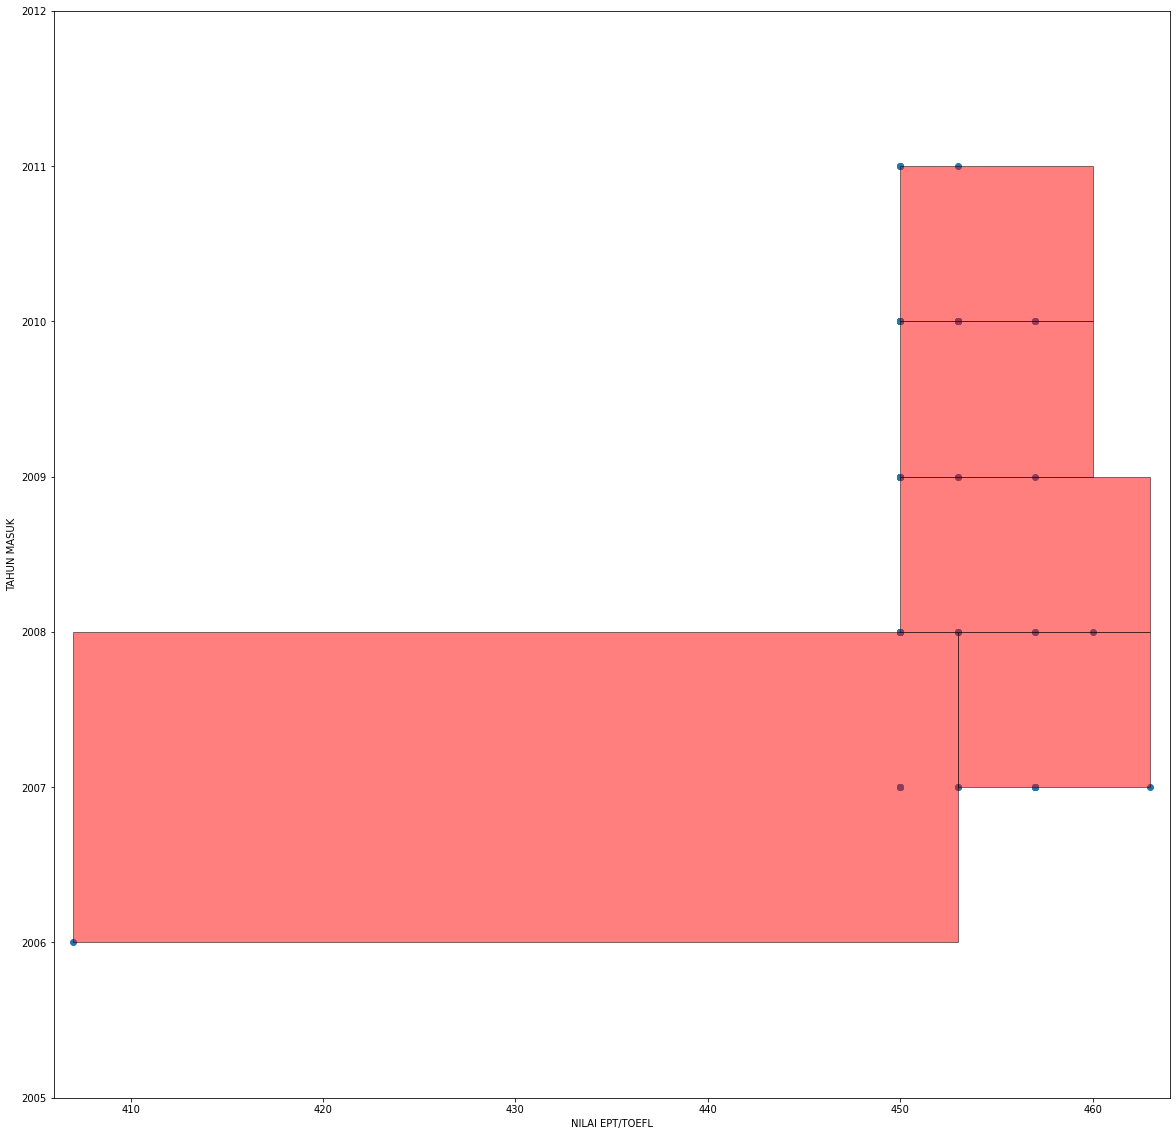

In [20]:
pl.figure(figsize=(20,20))
ax = pl.subplot(111)
plot_rects(df, ax, rects, column_x, column_y, facecolor='r')
pl.scatter(df[column_x], df[column_y])
pl.show()

# Generating an k-Anonymous Dataset

Of course, to use the data we want to produce a new dataset that contains one row for each partition and value of the sensitive attribute. To do this, we need to aggregate the columns in each partition.  Let's do this!

In [21]:
def agg_categorical_column(series):
    return [','.join(set(series))]

def agg_numerical_column(series):
    return [series.mean()]

In [22]:
def build_anonymized_dataset(df, partitions, feature_columns, sensitive_column, max_partitions=None):
    aggregations = {}
    for column in feature_columns:
        if column in categorical:
            aggregations[column] = agg_categorical_column
        else:
            aggregations[column] = agg_numerical_column
    rows = []
    for i, partition in enumerate(partitions):
        if i % 100 == 1:
            print("Finished {} partitions...".format(i))
        if max_partitions is not None and i > max_partitions:
            break
        grouped_columns = df.loc[partition].agg(aggregations, squeeze=False)
        sensitive_counts = df.loc[partition].groupby(sensitive_column).agg({sensitive_column : 'count'})
        values = grouped_columns.iloc[0].to_dict()
        for sensitive_value, count in sensitive_counts[sensitive_column].items():
            if count == 0:
                continue
            values.update({
                sensitive_column : sensitive_value,
                'count' : count,

            })
            rows.append(values.copy())
    return pd.DataFrame(rows)

In [23]:
dfn = build_anonymized_dataset(df, finished_partitions, feature_columns, sensitive_column)

Finished 1 partitions...


In [24]:
dfn.to_csv('anonymized_dataset.csv', index=False)
# we sort the resulting dataframe using the feature columns and the sensitive attribute
dfn.sort_values(feature_columns+[sensitive_column])

,NILAI EPT/TOEFL,TAHUN MASUK,EMAIL,count
5,441.400000,2006.800000,gmail.com,1
6,441.400000,2006.800000,outlook.com,1
7,441.400000,2006.800000,yahoo.co.id,2
8,441.400000,2006.800000,yahoo.com,1
19,450.722222,2009.000000,gmail.com,5
20,450.722222,2009.000000,yahoo.co.id,5
21,450.722222,2009.000000,yahoo.com,6
22,450.722222,2009.000000,ymail.com,2
0,451.105263,2010.070175,gmail.com,14
1,451.105263,2010.070175,rocketmail.com,2
